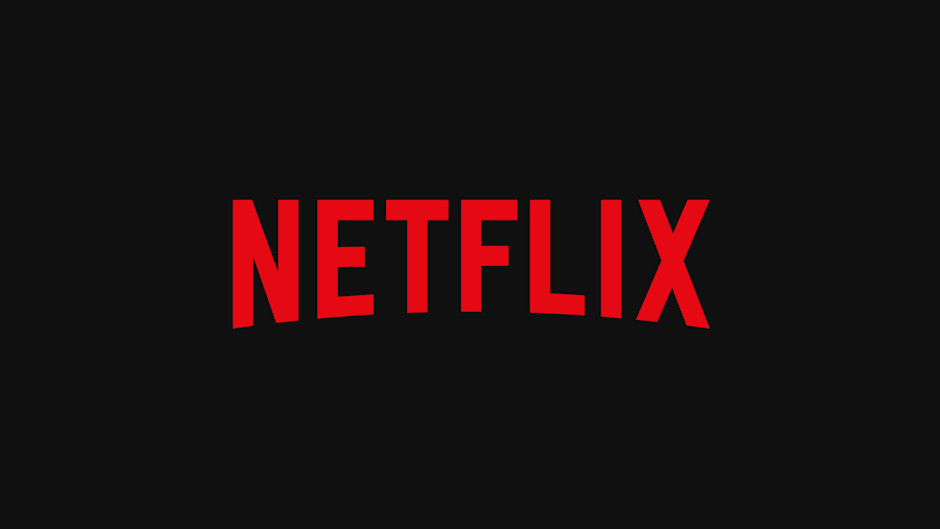

# ***✨*NETFLIX MOST POPULAR SHOWS EDA *✨***

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
data = pd.read_csv('/content/most-popular_country_weekly.tsv', delimiter = '\t')


In [7]:
data.head()

,country_name,country_iso2,week,category,weekly_rank,show_title,season_title,cumulative_weeks_in_top_10
0,Argentina,AR,2025-01-12,Films,1,The Secret Life of Pets 2,NaN,7
1,Argentina,AR,2025-01-12,Films,2,Ad Vitam,NaN,1
2,Argentina,AR,2025-01-12,Films,3,The Love Scam,NaN,2
3,Argentina,AR,2025-01-12,Films,4,Eye for an Eye,NaN,1
4,Argentina,AR,2025-01-12,Films,5,Ma,NaN,3


In [8]:
data.columns

Index(['country_name', 'country_iso2', 'week', 'category', 'weekly_rank',
       'show_title', 'season_title', 'cumulative_weeks_in_top_10'],
      dtype='object')

# **Top 10 Countries with most and least number no. of TV shows and Movies**

In [9]:
query1 = data.show_title.groupby([data.category,data.country_name]).count()

<ipython-input-10-fecce51aaddc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = sub_query2.index,x = sub_query2.values, palette = netflix_palette)


<Axes: title={'center': 'Top 10 countries with least no. of Films'}, ylabel='country_name'>

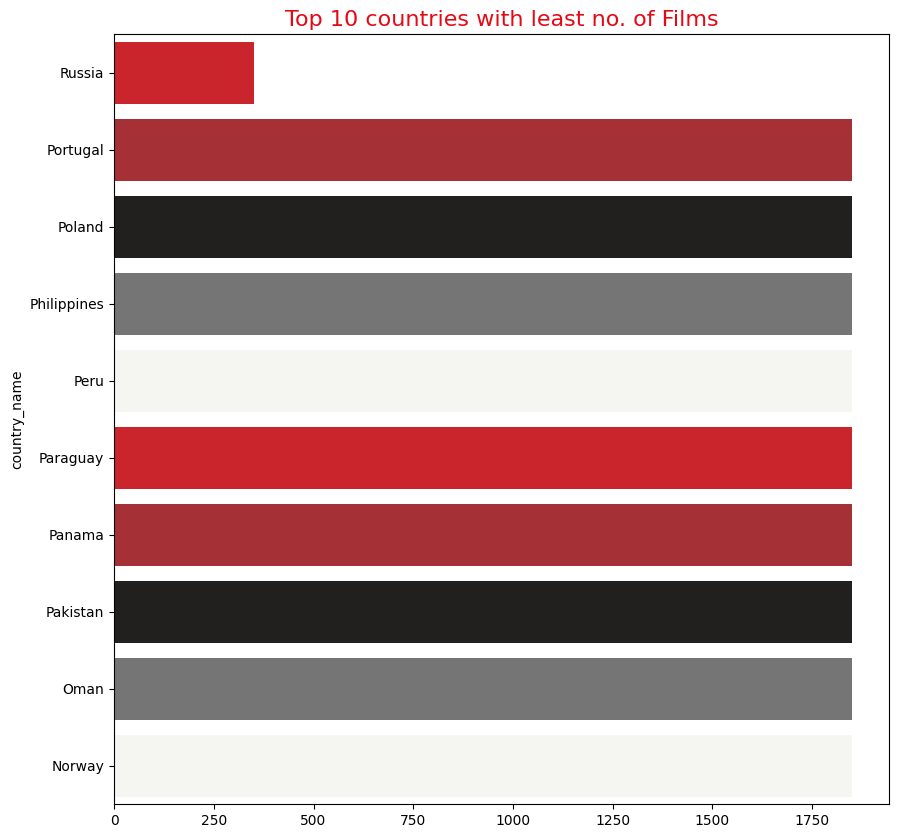

In [10]:
netflix_palette = ["#E50914", "#B81D24", "#221F1F", "#757575", "#F5F5F1"] * 2  # Repeat to cover 10 bars
sub_query2 = query1[('Films',)].sort_values(ascending =True)[:10]
plt.figure(figsize =(10,10))
plt.title('Top 10 countries with least no. of Films', fontsize=16, color="#E50914")
sns.barplot(y = sub_query2.index,x = sub_query2.values, palette = netflix_palette)



<ipython-input-11-5b799c9b6b7b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = sub_query1.index,x = sub_query1.values, palette = netflix_palette)


<Axes: title={'center': 'Top 10 Countries with most no.of Films'}, ylabel='country_name'>

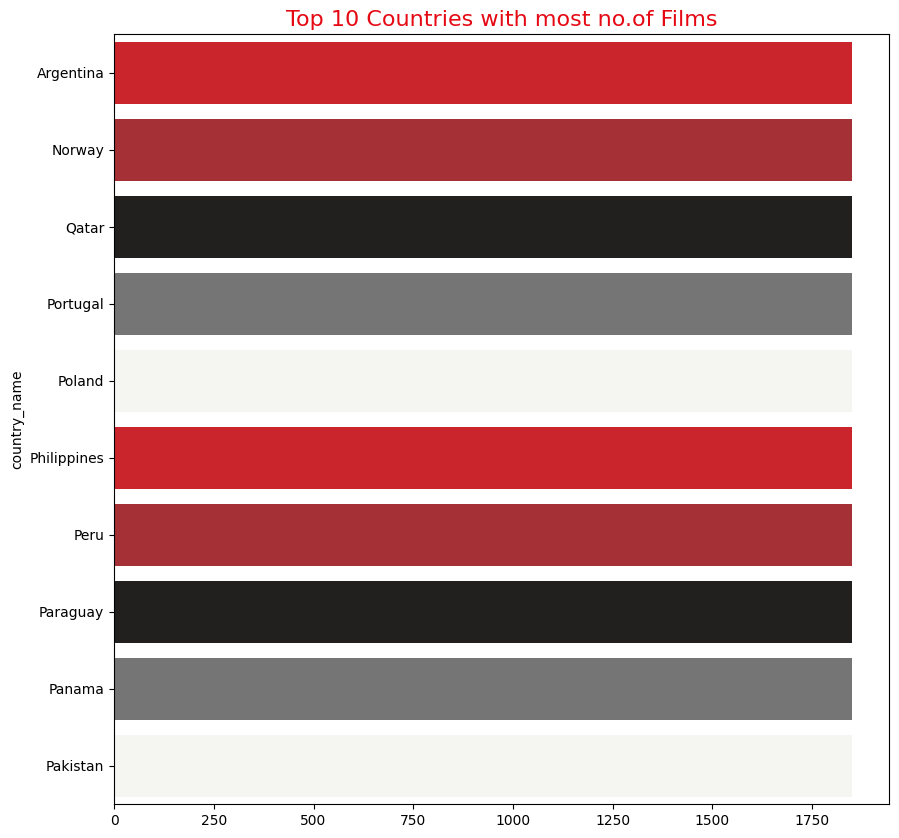

In [11]:
netflix_palette = ["#E50914", "#B81D24", "#221F1F", "#757575", "#F5F5F1"] * 2  # Repeat to cover 10 bars
sub_query1 = query1[('Films', )].sort_values(ascending =False)[:10]
plt.figure(figsize =(10,10))
plt.title('Top 10 Countries with most no.of Films', fontsize=16, color="#E50914")
sns.barplot(y = sub_query1.index,x = sub_query1.values, palette = netflix_palette)

<ipython-input-12-ffabaa08a608>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = sub_query3.index,x = sub_query3.values, palette = netflix_palette)


<Axes: title={'center': 'Top 10 countries with most no. of TV Shows'}, ylabel='country_name'>

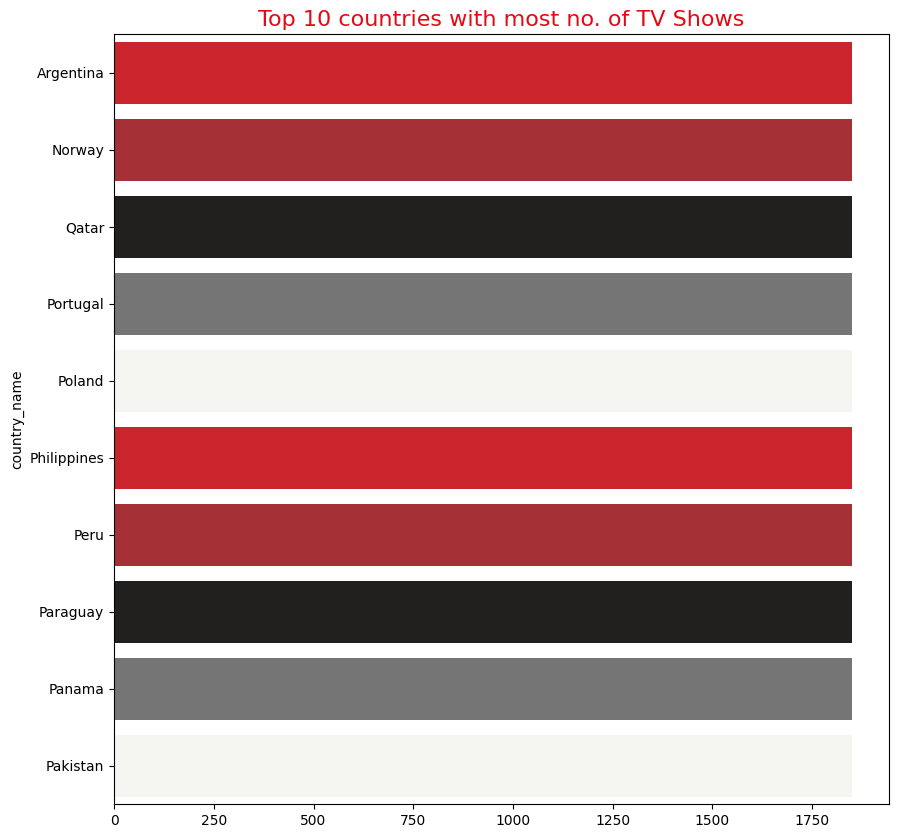

In [12]:

sub_query3 = query1[('TV',)].sort_values(ascending =False)[:10]
plt.figure(figsize =(10,10))
plt.title('Top 10 countries with most no. of TV Shows', fontsize=16, color="#E50914")
sns.barplot(y = sub_query3.index,x = sub_query3.values, palette = netflix_palette)

<ipython-input-13-8700a9817388>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = sub_query4.index,x = sub_query4.values, palette = netflix_palette)


<Axes: title={'center': 'Top 10 countries with most no. of TV Shows'}, ylabel='country_name'>

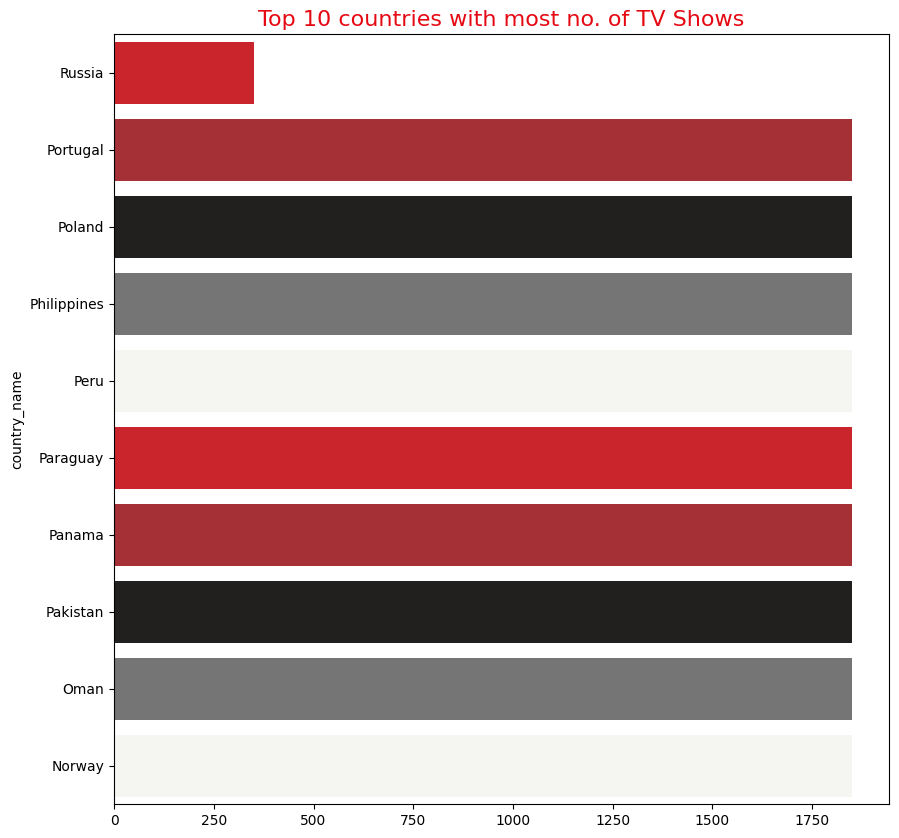

In [13]:
sub_query4 = query1[('TV',)].sort_values(ascending =True)[:10]
plt.figure(figsize =(10,10))
plt.title('Top 10 countries with most no. of TV Shows', fontsize=16, color="#E50914")
sns.barplot(y = sub_query4.index,x = sub_query4.values, palette = netflix_palette)

# **Top 10 Countries with Most No. of Films Released in 2024**

In [14]:
data['week'] = pd.to_datetime(data['week'])

# Extract the year from 'week' and include it in the grouping
query5 = data.show_title.groupby([data.category, data.week.dt.year, data.country_name]).count()

<ipython-input-15-a41184525ae2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = sub_query5.index,x = sub_query5.values, palette = netflix_palette)


Text(0.5, 1.0, 'Top 10 Countries with Most No. of Films Released in 2024')

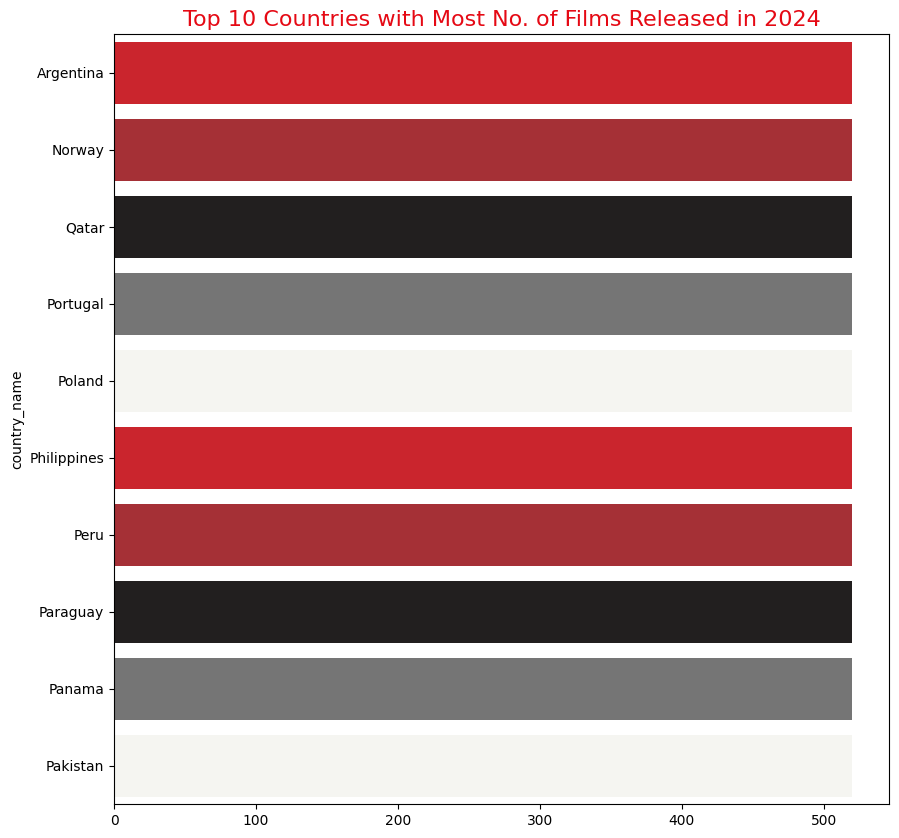

In [15]:
sub_query5=query5[('Films',2024,)].sort_values(ascending = False)[:10]
plt.figure(figsize =(10,10))
sns.barplot(y = sub_query5.index,x = sub_query5.values, palette = netflix_palette)
plt.title('Top 10 Countries with Most No. of Films Released in 2024', fontsize=16, color="#E50914")


# **Top 10 Shows by Cumulative Weeks in Top 10**

<ipython-input-16-502826daa71d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_shows.values, y=top_shows.index, palette= netflix_palette)


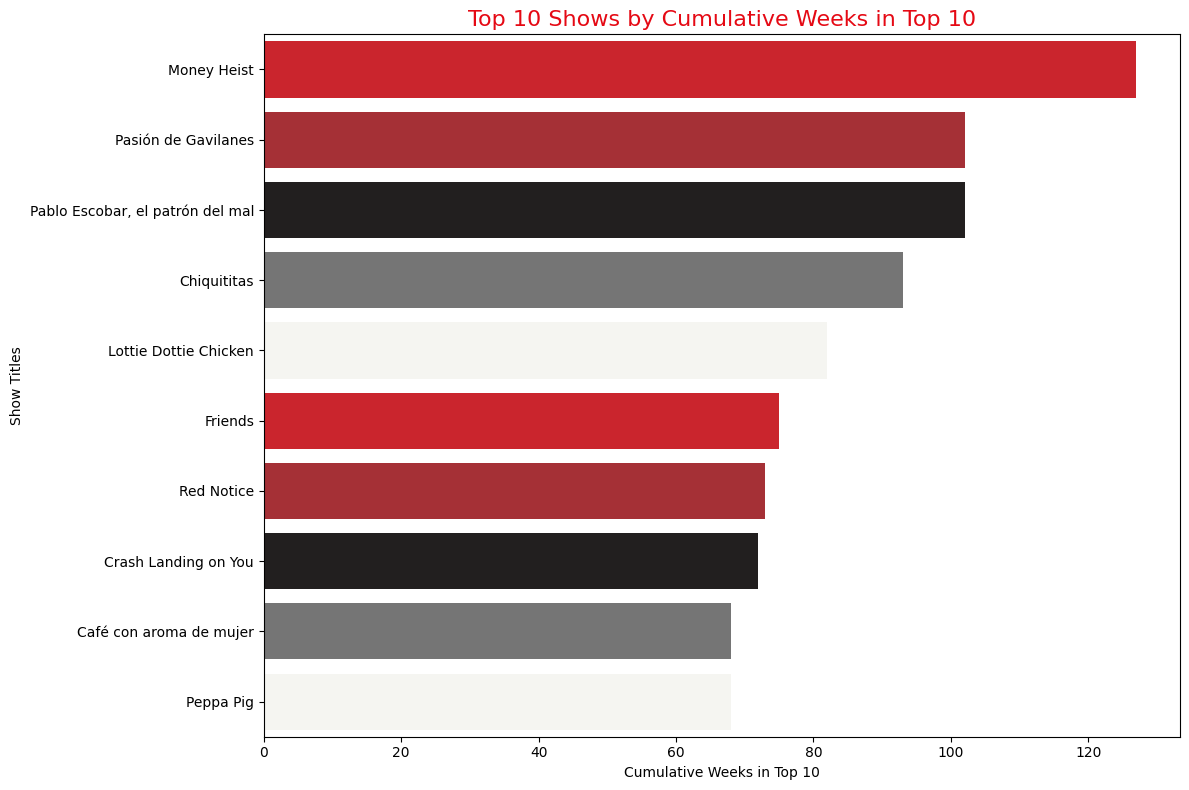

In [16]:
top_shows = data.groupby('show_title')['cumulative_weeks_in_top_10'].max().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_shows.values, y=top_shows.index, palette= netflix_palette)
plt.title('Top 10 Shows by Cumulative Weeks in Top 10',  fontsize=16, color="#E50914")
plt.xlabel('Cumulative Weeks in Top 10')
plt.ylabel('Show Titles')
plt.tight_layout()
plt.show()

# **Category Distribution of Shows**

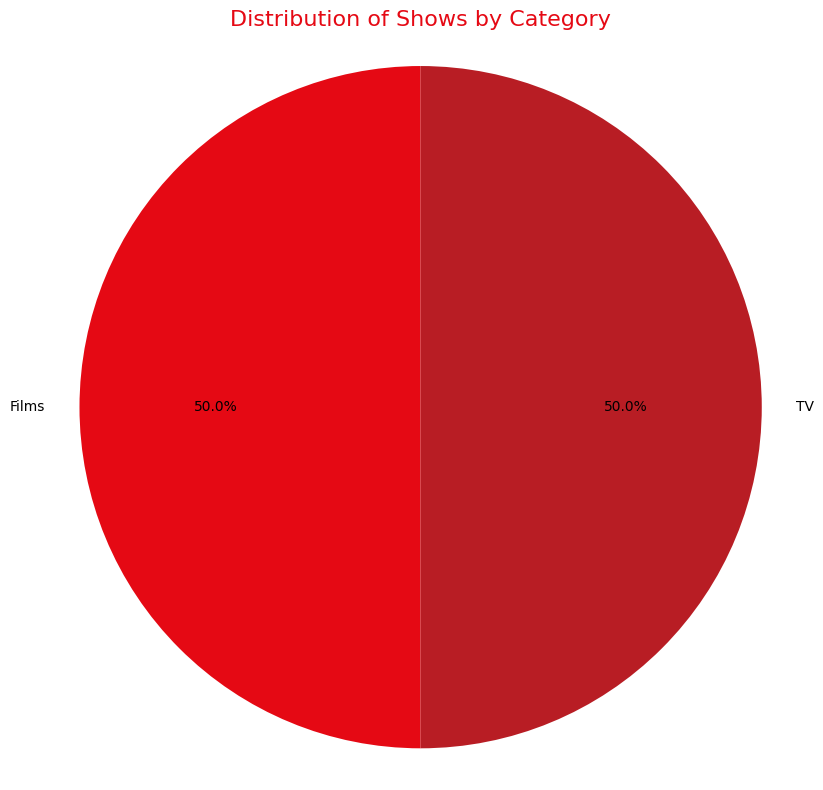

In [20]:
import matplotlib.pyplot as plt

# Calculate the counts of each category
category_counts = data['category'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette( netflix_palette, len(category_counts)))
plt.title('Distribution of Shows by Category', fontsize=16, color="#E50914")

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()